# Audio Waveform and Mel-Spectrogram Visualization
This notebook demonstrates how to visualize an audio waveform and its corresponding Mel-spectrogram using the NSynth dataset and torchaudio library.

Key: keyboard_electronic_002-022-050
Original audio:


mel_spec_db.shape =  torch.Size([1, 64, 251])


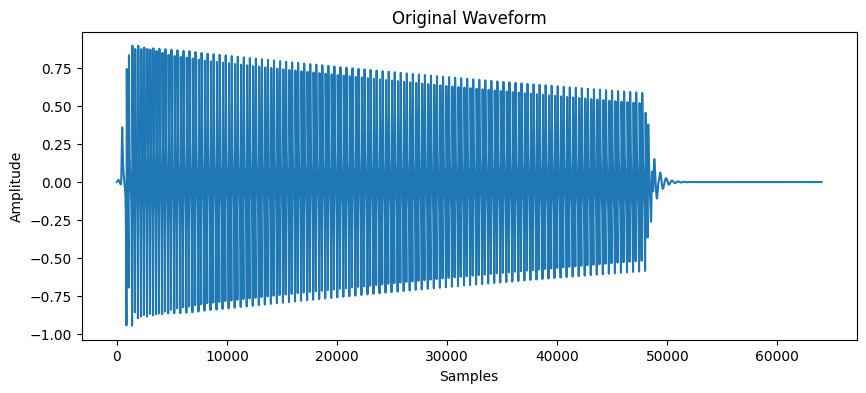

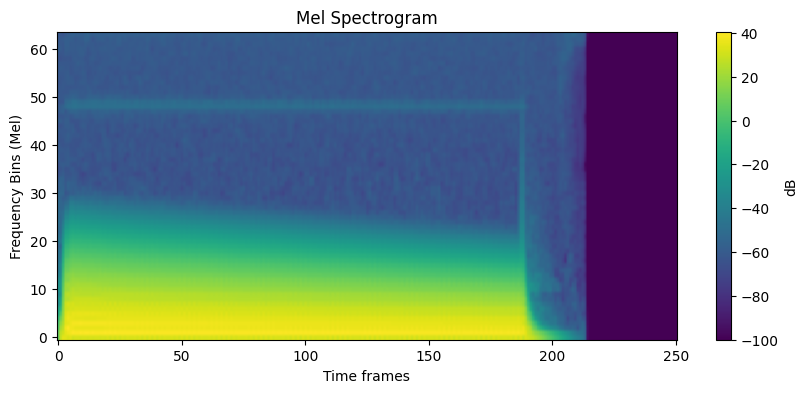

reconstructed.shape =  (64, 251)
Reconstructed audio:


In [9]:
%run init_notebook.py

import torch
import torchaudio
import librosa
import numpy as np
from IPython.display import display

from src.dataset import NSynth
from src.utils.audio_utils import *
from src.utils.audio_utils import listen

# 1) Load dataset and pick a sample
dataset = NSynth('testing')
waveform, sample_rate, key, _ = dataset[2567]

print(f"Key: {key}")

# 2) Listen to original
print("Original audio:")
display(listen(waveform, sample_rate))

# 3) Define MelSpectrogram transforms
n_fft = 1024
hop_length = n_fft // 4
n_mels = 64

mel_transform = torchaudio.transforms.MelSpectrogram(
    sample_rate=sample_rate,
    n_fft=n_fft,
    hop_length=hop_length,
    n_mels=n_mels,
)
db_transform = torchaudio.transforms.AmplitudeToDB(stype="power")

# 4) Convert to log-mel
with torch.no_grad():
    mel_spec = mel_transform(waveform)   # [1, n_mels, time_frames]
    mel_spec_db = db_transform(mel_spec) # [1, n_mels, time_frames]
    print("mel_spec_db.shape = ", mel_spec_db.shape)

# 5) Plot waveform and spectrogram
plot_waveform(waveform)
plot_spectogram(mel_spec_db)

# 6) Reconstruct waveform
n_iter = 512  # Iterations for Griffin-Lim Algorithm
mel_db_np = mel_spec_db.squeeze(0).numpy()
print("reconstructed.shape = ", mel_db_np.shape)
mel_power = librosa.db_to_power(mel_db_np)
reconstructed = librosa.feature.inverse.mel_to_audio(
    mel_power, sr=sample_rate, n_fft=n_fft, hop_length=hop_length, n_iter=n_iter
)

# 7) Listen to reconstruction
print("Reconstructed audio:")
display(listen(reconstructed, sample_rate))
